# 14.4. The Central Limit Theorem

Very few of the data histograms that we have seen in this course have been bell shaped. When we have come across a bell shaped distribution, it has almost invariably been an empirical histogram of a statistic based on a random sample.

The examples below show two very different situations in which an approximate bell shape appears in such histograms.

## 14.4.1. Net Gain in Roulette

In an earlier section, the bell appeared as the rough shape of the total amount of money we would make if we placed the same bet repeatedly on different spins of a roulette wheel.

In [1]:
path_data = '../../data/'
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wheel = Table.read_table(path_data + 
        'roulette_wheel.csv')   ### hw06
# wheel.show(5)
wheel.show()

Pocket,Color
0,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [3]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

The table red shows each pocket’s winnings on red.



In [4]:
### tbl.apply(function, column)
red = wheel.with_column('Winnings: Red', 
    wheel.apply(red_winnings, 'Color'))   

red.show(5)

Pocket,Color,Winnings: Red
0,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1


In [5]:
### chance of winning
red.group('Color')

Color,count
black,18
green,2
red,18


In [6]:
# red_win = red.where('Winnings: Red', are.equal_to(1))
# red_win.show(3)
# red_win.num_rows

red.where('Winnings: Red', are.equal_to(1)).num_rows

##### 18/38 chance of winning 1 and 20/38 chance of losing 1

18

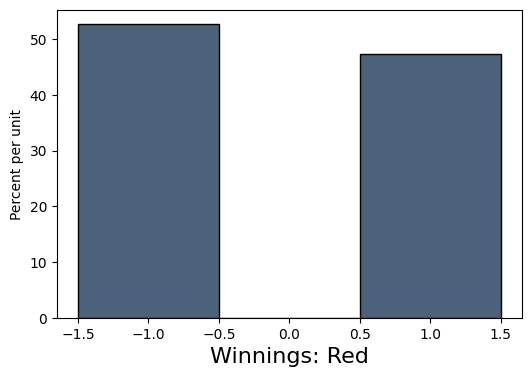

In [7]:
##### visutalize probability distribution
# red.select('Color').hist()   ### tbl.hist(column)
red.hist('Winnings: Red', bins = np.arange(-1.5, 2, 1))

In [8]:
# bet_on_red = red.sample(1, 'Winnings: Red')
red.sample(1, 'Winnings: Red')

Pocket,Color,Winnings: Red
0,green,-1


In [9]:
# bet_on_red = red.sample(1, 'Winnings: Red')
# bet_on_red = red.sample(1, 'Winnings: Red')[2][0]
# bet_on_red

red.sample(1, 'Winnings: Red')[2][0]

-1

In [10]:
### turn one bet into function

def bet_on_red():
    return (red.sample(1, 'Winnings: Red')[2][0])

In [11]:
bet_on_red()

-1

In [12]:
##### net gain of 400 spins betting on red for $1

num_bets = 400
repetitions = 1000
bets_array = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    net_gain_400 = spins.column('Winnings: Red').sum()
    bets_array = np.append(bets_array, net_gain_400)
    # net_gain = bets_array.sum()

# bets_array
results = Table().with_column("Net Gain on Red", bets_array)
results

Net Gain on Red
-32
-14
-18
-12
-6
28
-20
-44
-24
-28


In [13]:
from scipy import stats
import pandas as pd

In [14]:
tbl = Table().with_column('Red Net', bets_array).to_df().describe()
tbl = Table().with_column('Red Net', bets_array)

tbl.to_df().describe()

,Red Net
count,1000.000000
mean,-21.646000
std,20.265275
min,-94.000000
25%,-36.000000
50%,-22.000000
75%,-6.000000
max,36.000000


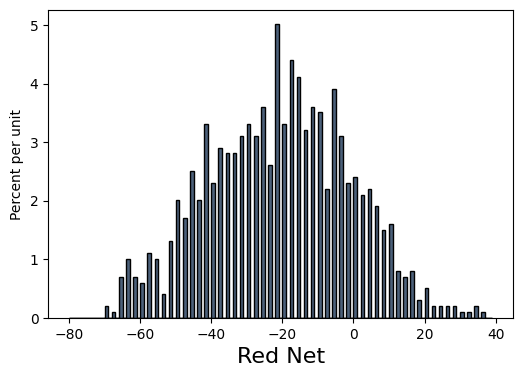

In [15]:
Table().with_column('Red Net', bets_array).hist(bins = np.arange(-80, 40, 1))
# Table().with_column('Red Net', bets_array).hist(bins = np.arange(-80, 50, 6))

Center. The distribution is centered near -20 dollars, roughly. To see why, note that your winnings will be 1 on about 18/38 of the bets, and -$1 on the remaining 20/38. So your average winnings per dollar bet will be roughly -5.26 cents:

In [16]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [17]:
##### in 400 bets you expect that your net gain will be about -$21:
400 * average_per_bet

-21.052631578947366

In [18]:
##### mean of the 10,000 simulated net gains:
np.mean(tbl.column(0))

-21.646000000000001

Spread. Run your eye along the curve starting at the center and notice that the point of inflection is near 0. On a bell shaped curve, the SD is the distance from the center to a point of inflection. The center is roughly -20, which means that the SD of the distribution is around $20.

In the next section we will see where the $20 comes from. For now, let’s confirm our observation by simply calculating the SD of the 10,000 simulated net gains:

In [19]:

np.std(tbl.column(0))

20.255139693421025

Summary. The net gain in 400 bets is the sum of the 400 amounts won on each individual bet. The probability distribution of that sum is approximately normal, with an average and an SD that we can approximate.

## 14.4.2. Average Flight Delay

In [20]:
united = Table.read_table(path_data + 
        'united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


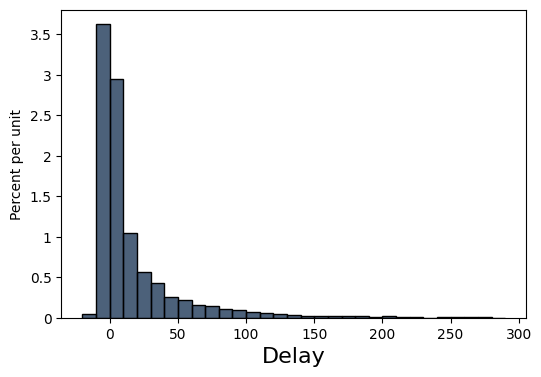

In [21]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [22]:
united.to_df().describe()

,Flight Number,Delay
count,13825.000000,13825.000000
mean,1133.415045,16.658156
std,571.858597,39.481628
min,3.000000,-16.000000
25%,591.000000,-2.000000
50%,1178.000000,2.000000
75%,1670.000000,18.000000
max,2117.000000,580.000000


The mean delay was about 16.6 minutes and the SD was about 39.5 minutes. Notice how large the SD is, compared to the mean. Those large deviations on the right have an effect, even though they are a very small proportion of the data.

In [23]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))
mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

Now suppose we sampled 400 delays at random with replacement. You could sample without replacement if you like, but the results would be very similar to with-replacement sampling. If you sample a few hundred out of 13,825 without replacement, you hardly change the population each time you pull out a value.

In the sample, what could the average delay be? We expect it to be around 16 or 17, because that’s the population average; but it is likely to be somewhat off. Let’s see what we get by sampling. We’ll work with the table delay that only contains the column of delays.

In [24]:
delay = united.select('Delay')
delay

Delay
257
28
-3
0
64
-6
-8
12
20
-10


In [25]:
delay = united.select('Delay')
np.mean(delay.sample(400).column('Delay'))

19.6875

The sample average varies according to how the sample comes out, so we will simulate the sampling process repeatedly and draw the empirical histogram of the sample average. That will be an approximation to the probability histogram of the sample average.



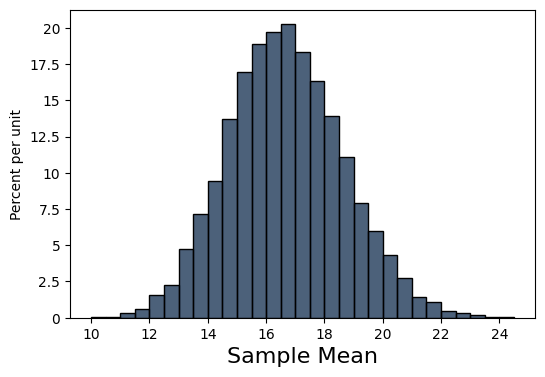

In [26]:
sample_size = 400
repetitions = 10000
means = make_array()
for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)
results = Table().with_column(
    'Sample Mean', means)
results.hist(bins=np.arange(10, 25, 0.5))

Once again, we see a rough bell shape, even though we are drawing from a very skewed distribution. The bell is centered somewhere between 16 ad 17, as we expect.

## 14.4.3. Central Limit Theorem


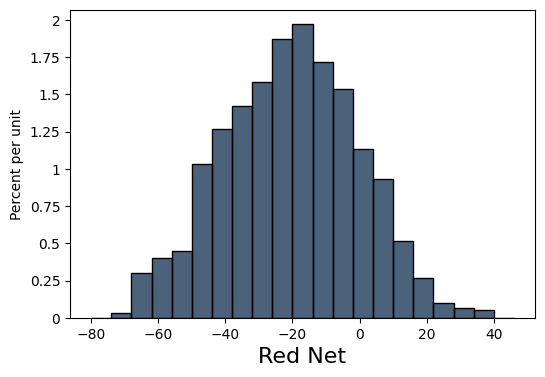

In [27]:
Table().with_column('Red Net', bets_array).hist(bins = np.arange(-80, 50, 6))

That’s a roughly bell shaped histogram, even though the distribution we are drawing from is nowhere near bell shaped.

**Center**. The distribution is centered near -20 dollars, roughly. To see why, note that your winnings will be 1 on about 18/38 of the bets, and -$1 on the remaining 20/38. So your average winnings per dollar bet will be roughly -5.26 cents:

In [28]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [29]:
400 * average_per_bet

-21.052631578947366

In [30]:
import numpy as np

np.mean(results.column(0))

### mean from simulation

16.67963275


**Spread**. Run your eye along the curve starting at the center and notice that the point of inflection is near 0. On a bell shaped curve, the SD is the distance from the center to a point of inflection. The center is roughly -20, which means that the SD of the distribution is around $20.

In the next section we will see where the $20 comes from. For now, let’s confirm our observation by simply calculating the SD of the 10,000 simulated net gains:

In [31]:
np.std(results.column(0))

1.9757856897959447

## 14.4.2. Average Flight Delay

The table united contains data on departure delays of 13,825 United Airlines domestic flights out of San Francisco airport in the summer of 2015. As we have seen before, the distribution of delays has a long right-hand tail.

In [32]:
united = Table.read_table(path_data + 'united_summer2015.csv')

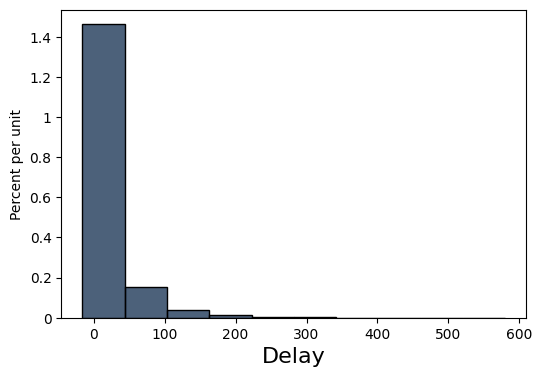

In [33]:
united.select('Delay').hist()

In [34]:
united.select('Delay').to_df().describe()

,Delay
count,13825.000000
mean,16.658156
std,39.481628
min,-16.000000
25%,-2.000000
50%,2.000000
75%,18.000000
max,580.000000


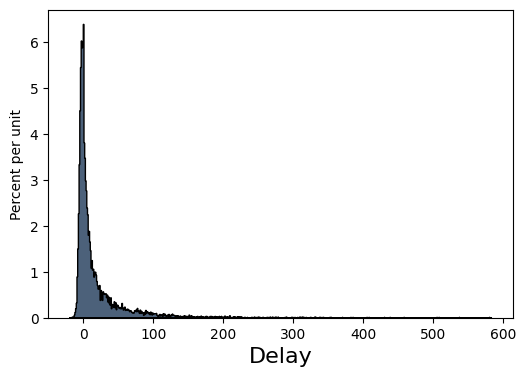

In [35]:
united.select('Delay').hist(bins=np.arange(-20, 585, 1))

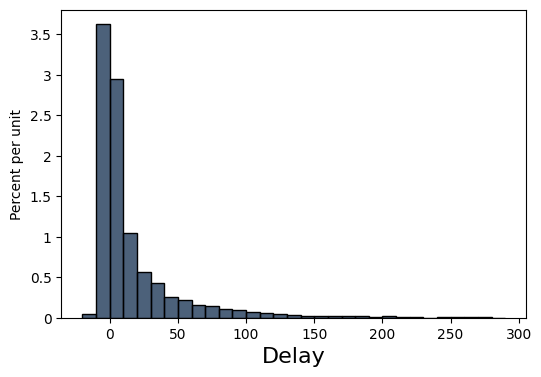

In [36]:
#### use the textbook version

united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [37]:
### mean delay and sd ==> or see describe() above

mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [38]:
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


### simulation: sample 400 delays at random with replacement.
- You could sample without replacement if you like, but the results would be very similar to with-replacement sampling.
- If you sample a few hundred out of 13,825 without replacement, you hardly change the population each time you pull out a value.

In [39]:
# step 1. get table
delay = united.select('Delay')
delay.show(5)

Delay
257
28
-3
0
64


In [40]:
###### sample 400 samples and take mean

np.mean(delay.sample(400).column('Delay'))   ### sample() returns a new table

17.745000000000001

In [41]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

In [42]:
results.to_df().describe()

,Sample Mean
count,10000.000000
mean,16.645311
std,1.982680
min,9.955000
25%,15.284375
50%,16.567500
75%,17.968125
max,27.072500


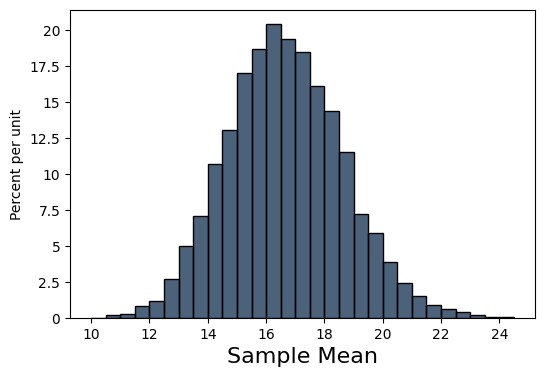

In [43]:
results.hist(bins = np.arange(10, 25, 0.5))

Once again, we see a rough bell shape, even though we are drawing from a very skewed distribution. The bell is centered somewhere between 16 ad 17, as we expect

## 14.4.3. Central Limit Theorem

- The reason why the bell shape appears in such settings is a remarkable result of probability theory called the **Central Limit Theorem**.

- **The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.**

- As we noted when we were studying Chebychev’s bounds, results that can be applied to random samples regardless of the distribution of the population are very powerful, because in data science we rarely know the distribution of the population.

- The Central Limit Theorem makes it possible to **make inferences** with very little knowledge about the population, provided we have a large random sample. That is why it is central to the field of statistical inference.

## 14.4.4. Proportion of Purple Flowers

- Recall Mendel’s probability model for the colors of the flowers of a species of pea plant. The model says that the flower colors of the plants are like draws made at random with replacement from {Purple, Purple, Purple, White}.

- In a large sample of plants, about what proportion will have purple flowers? We would expect the answer to be about 0.75, the proportion purple in the model. And, because proportions are means, the Central Limit Theorem says that the distribution of the sample proportion of purple plants is roughly normal.

- We can confirm this by simulation. Let’s simulate the proportion of purple-flowered plants in a sample of 200 plants.

In [53]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')
model = Table().with_column('Color', colors)
model

Color
Purple
Purple
Purple
White


,Sample Proportion: 200
count,10000.000000
mean,0.750121
std,0.030484
min,0.630000
25%,0.730000
50%,0.750000
75%,0.770000
max,0.855000


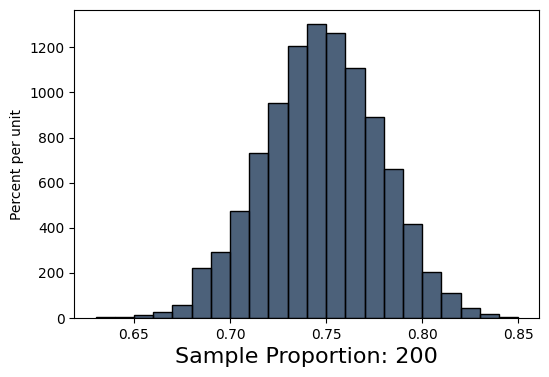

In [58]:
props = make_array()
num_plants = 200
repetitions = 10000
for i in np.arange(repetitions):
    sample = model.sample(num_plants)   ### table of 200 
    new_prop = np.count_nonzero(
        sample.column('Color') == 'Purple')/num_plants   ### proportion
    props = np.append(props, new_prop)   ### array
    
results = Table().with_column('Sample Proportion: 200', props)   ### turn array to table
results.hist(bins=np.arange(0.63, 0.86, 0.01))
results.to_df().describe()

There’s that normal curve again, as predicted by the Central Limit Theorem, centered at around 0.75 just as you would expect.

How would this distribution change if we increased the sample size? Let’s run the code again with a sample size of 800, and collect the results of simulations in the same table in which we collected simulations based on a sample size of 200. We will keep the number of repetitions the same as before so that the two columns have the same length.

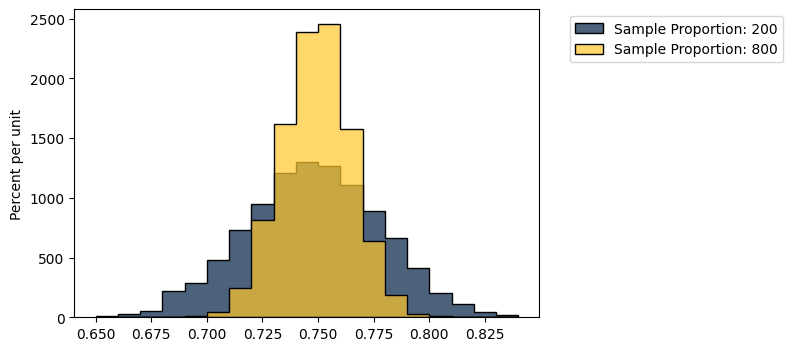

In [63]:
props2 = make_array()
num_plants = 800      ### instead of 200
for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(
        sample.column('Color') =='Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', 
                              props2)
results.hist(bins=np.arange(0.65, 0.85, 0.01))

- Both distributions are approximately **normal** but one is narrower than the other. The proportions based on a sample size of 800 are more tightly clustered around 0.75 than those from a sample size of 200. **Increasing the sample size has decreased the variability in the sample proportion**.

This should not be surprising. We have leaned many times on the intuition that a **larger sample size generally reduces the variability of a statistic**. However, in the case of a sample average, we can quantify the relationship between sample size and variability.

Exactly how does the sample size affect the variability of a sample average or proportion? That is the question we will examine in the next section.

In [48]:
np.random.normal(0, 1, 10)

array([ 0.86128142,  1.7328293 , -0.06204118,  0.10116824, -0.14745099,
       -0.14073319, -0.22861993,  0.3699771 ,  0.01508664,  0.24534259])

In [ ]:
np.sample()